In [38]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [39]:
data_dir = "/content/drive/MyDrive/test_set"

In [40]:
image_size = (64, 64)
categories = ['cats', 'dogs']
X = []
y = []

for label, category in enumerate(categories):
    folder_path = os.path.join(data_dir, category)
    for file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, file)
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, image_size)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            X.append(gray.flatten())
            y.append(label)
        except:
            continue

X = np.array(X)
y = np.array(y)

print(f"Loaded {len(X)} images.")

Loaded 2062 images.


In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("Train size:", len(X_train))
print("Test size:", len(X_test))

Train size: 1649
Test size: 413


In [42]:
svm = SVC(kernel='linear')
print("Training SVM...")
svm.fit(X_train, y_train)
print("Training done.")

Training SVM...
Training done.


In [43]:
y_pred = svm.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=categories))

Accuracy: 0.5520581113801453

Classification Report:
               precision    recall  f1-score   support

        cats       0.55      0.60      0.57       207
        dogs       0.56      0.50      0.53       206

    accuracy                           0.55       413
   macro avg       0.55      0.55      0.55       413
weighted avg       0.55      0.55      0.55       413



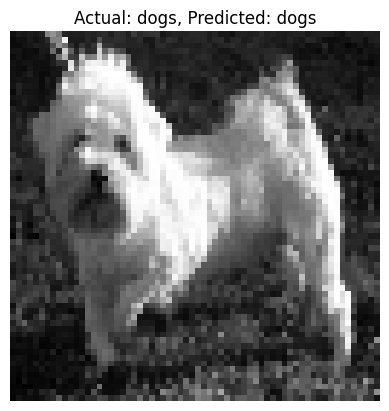

In [44]:
idx = np.random.randint(0, len(X_test))
sample = X_test[idx].reshape(image_size)
actual = y_test[idx]
predicted = svm.predict([X_test[idx]])[0]

plt.imshow(sample, cmap='gray')
plt.title(f"Actual: {categories[actual]}, Predicted: {categories[predicted]}")
plt.axis('off')
plt.show()

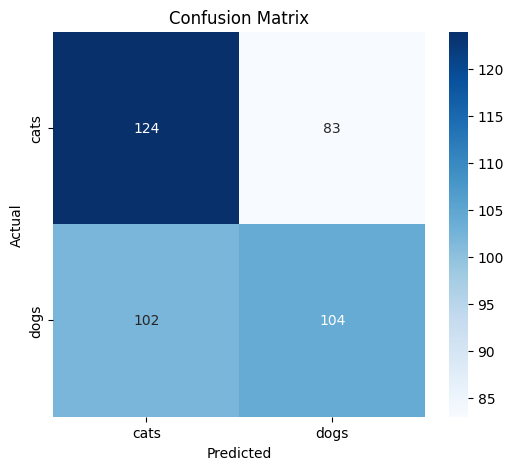

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = svm.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()